# Simple application of Bayesian analysis

Bayesian analysis of systems using data is based on Bayes theorem, and has the form

$$
P\left(A\left|data\right.\right)=\frac{P\left(data|A\right)P(A)}{P(data)}.
$$

Conditional probabilities of different versions of data given events of interest, are usually known from system construction. Prior probabilities of events of interest $A$ are based on knowledge acquired to the moment. After observing actual data one may update probability of $A$ using the Bayes theorem.

In the example here events of interest $A$ are formed from a combination of independent factors, so direct using of the Bayes formula becomes cumbersome. To make things transparent, we use Monte Carlo simulations to approximate updated probabilities.

## 1. Emily, Car, Stock Market, Sweepstakes, Vacation and Bayes.

Emily is taking Bayesian Analysis course. She believes she will get an A with probability 0.6, a B with probability 0.3, and a C or less with probability 0.1. At the end of semester she will get a car as a present form her (very) rich uncle depending on her class performance. For getting an A in the course Emily will get a car with probability 0.8, for B with probability 0.5, and for anything less than B, she will get a car with probability of 0.2. These are the probabilities if the market is bullish. If the market is bearish, the uncle is less likely to make expensive presents, and the above probabilities are 0.5, 0.3, and 0.1, respectively. The probabilities of bullish and bearish market are equal, 0.5 each. If Emily gets a car, she would travel to Redington Shores with probability 0.7, or stay on campus with probability 0.3. If she does not get a car, these two probabilities are 0.2 and 0.8, respectively. Independently, Emily may be a lucky winner of a sweepstake lottery for a free air ticket and vacation in hotel Sol at Redington Shores. The chance to win the sweepstake is 0.001, but if Emily wins, she will go to vacation with probability of 0.99, irrespective of what happened with the car.

After the semester was over you learned that Emily is at Redington Shores.
- (a) What is the probability that she got a car?
- (b) What is the probability that she won the sweepstakes?
- (c) What is the probability that she got a B in the course?
- (d) What is the probability that the market was bearish?

In [1]:
import numpy as np
import pandas as pd
# from scipy.special import comb
import scipy.stats as ss
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
p_grade = np.array([0.6, 0.3, 0.1])       # A, B, C
p_market = np.array([0.5, 0.5])           # bull, bear
p_car_grade_market = np.array([[0.8, 0.5, 0.2], [0.5, 0.3, 0.1]])
p_car_travel = np.array([0.2, 0.7])
p_win = np.array([0.999, 0.001])          # no win, win
p_win_travel = np.array([0.01, 0.99])     # travel, no travel | win

In [3]:
# number of Monte Carlo trials
n_trials = 1000000

# function for applying
lam = lambda x: np.random.uniform() < x

# fill the dataframe with events
grades = np.random.choice(range(3), size=n_trials, p=p_grade)
df = pd.DataFrame(grades, columns=['grade'])
market = np.random.choice(range(2), size=n_trials, p=p_market)
df['market'] = market
lottery = np.random.choice(range(2), size=n_trials, p=p_win)
df['lottery'] = lottery
df['p_car'] = p_car_grade_market[df.market, df.grade]
df['car'] = df.p_car.apply(lambda p: np.random.uniform() < p).astype('int')
df['p_travel_car'] = p_car_travel[df.car]
df['p_travel_win'] = p_win_travel[df.lottery]
df['car_travel'] = df.p_travel_car.apply(lam)
df['win_travel'] = df.p_travel_win.apply(lam)
df['travel'] = df.car_travel | df.win_travel
df.head(10)

,grade,market,lottery,p_car,car,p_travel_car,p_travel_win,car_travel,win_travel,travel
0,0,0,0,0.8,0,0.2,0.01,False,False,False
1,1,1,0,0.3,0,0.2,0.01,False,False,False
2,1,0,0,0.5,1,0.7,0.01,True,False,True
3,0,1,0,0.5,1,0.7,0.01,True,False,True
4,1,0,0,0.5,0,0.2,0.01,False,False,False
5,1,0,0,0.5,1,0.7,0.01,True,False,True
6,1,1,0,0.3,0,0.2,0.01,False,False,False
7,0,1,0,0.5,1,0.7,0.01,True,False,True
8,0,0,0,0.8,1,0.7,0.01,True,False,True
9,0,0,0,0.8,0,0.2,0.01,False,False,False


## Verification

In [4]:
df.grade.value_counts(normalize=True)

0    0.600022
1    0.299934
2    0.100044
Name: grade, dtype: float64

In [5]:
df.market.value_counts(normalize=True)

1    0.50023
0    0.49977
Name: market, dtype: float64

In [6]:
df[df.market == 0].p_car.value_counts(normalize=True)

0.8    0.600142
0.5    0.300180
0.2    0.099678
Name: p_car, dtype: float64

In [7]:
df[df.market == 1].p_car.value_counts(normalize=True)

0.5    0.599902
0.3    0.299688
0.1    0.100410
Name: p_car, dtype: float64

In [8]:
df.lottery.value_counts(normalize=True)

0    0.999036
1    0.000964
Name: lottery, dtype: float64

## Answers

### Select records correspoding the data observed (Emily is at Redington Shores)

In [9]:
# Emily is at Reddington shores
dfa = df[df.travel == 1]

### (a) Probability of getting a car

In [10]:
# conditional probability of getting a car
pc_car = dfa.car.mean()
print('Conditional probability of getting a car = {0:.3f}'.format(pc_car))

Conditional probability of getting a car = 0.788


### (b) Probability of winning sweepstakes

In [11]:
pc_win = dfa.win_travel.mean()
print('Conditional probability of winning the sweepstakes = {0:.3f}'.format(pc_win))

Conditional probability of winning the sweepstakes = 0.023


### (c) Probability of getting the B grade

In [12]:
pc_b = (dfa.grade == 1).mean()
print('Conditional probability of getting the B grade = {0:.3f}'.format(pc_b))

Conditional probability of getting the B grade = 0.261


### (d) Probability that the market is bearish

In [13]:
pc_be = (dfa.market == 1).mean()
print('Conditional probability of the market being bearish = {0:.3f}'.format(pc_be))

Conditional probability of the market being bearish = 0.434


## Plots

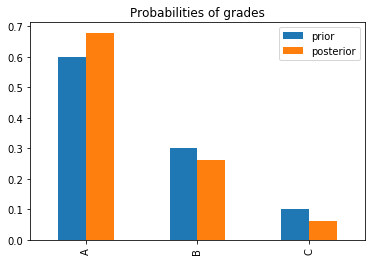

In [14]:
dfp = pd.DataFrame(p_grade, index=['A', 'B', 'C'], columns=['prior'])
ls = [(dfa.grade == k).mean() for k in range(3)]
dfp['posterior'] = ls
dfp.plot.bar(title='Probabilities of grades');
savefig('prob_grades.png');

## 2. Negative binomial distribution update

The number of failures until the fourth success in a series of independent trials is observed in 11 independent experiments: 5, 2, 2, 0, 1, 4, 3, 5, 0, 7, and 1 (You may link this to your favorite story, like, on multiple occasions Larry Bird shoots from a distance until he makes the 4th score, number of misses is counted). You are interested in probability p of a success in a single trial. Assume that p is given a beta prior with parameters
- (a) $\alpha=\beta=1$;
- (b) $\alpha=\beta=0.5$;
- (c) $\alpha=9,\beta=1$.

For each case (a)-(c) find: Bayes estimator of p, the 95% credible set for p, and the posterior probability of hypothesis H : p ≥ 0.8.

[Theory here, theorem 6](http://halweb.uc3m.es/esp/Personal/personas/mwiper/docencia/English/PhD_Bayesian_Statistics/ch3_2009.pdf) tells us that number of failures until the $r=4$-th success is observed follows the negative binomial distribution with probability mass function

$$
P(X=k|\theta)=C_{k+r-1}^k\;\theta^r(1-\theta)^k,\;k=0, 1, 2, \dots,
$$

where $\theta$ stands for the success probability in a single trial.

If we choose Beta distribution with parameters $\alpha, \beta$ as a prior for $\theta$, then posterior distribution of $\theta$ given data $x=(x_1,\dots,x_n)$ is Beta with parameters $\alpha + rn, \beta + \sum_{i=1}^n x_i$.

### Solution

In [15]:
# observations data
x = np.array([5, 2, 2, 0, 1, 4, 3, 5, 0, 7, 1])

In [16]:
def plot_one(alpha=1, beta=1, r=4):
    """ """
    n = x.size
    alpha_upd = alpha + r * n
    beta_upd = beta + x.sum()
    z = np.linspace(0, 1, 101)
    se = pd.Series(ss.beta.pdf(z, alpha, beta), index=z)
    se_upd = pd.Series(ss.beta.pdf(z, alpha_upd, beta_upd), index=z)
    se.plot(label='prior, ({0}, {1})'.format(alpha, beta));
    se_upd.plot(label='posterior, ({0}, {1})'.format(alpha_upd, beta_upd));
    inter = ss.beta.interval(0.95, alpha_upd, beta_upd)
    title('95% credible set ({0:.3f}, {1:.3f})'.format(inter[0], inter[1]));
    legend();

#### (a) $\alpha=\beta=1$

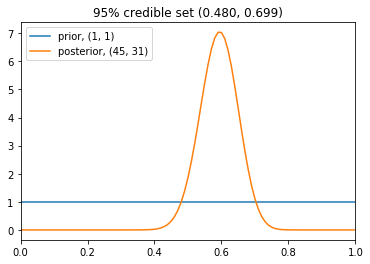

In [17]:
plot_one()

#### (b) $\alpha=\beta=0.5$

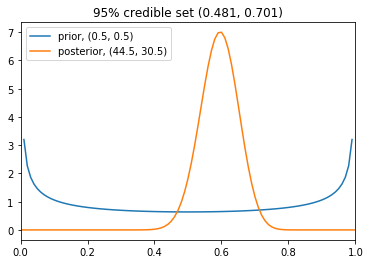

In [18]:
plot_one(alpha=0.5, beta=0.5)

#### (c) $\alpha=9,\;\beta=1$

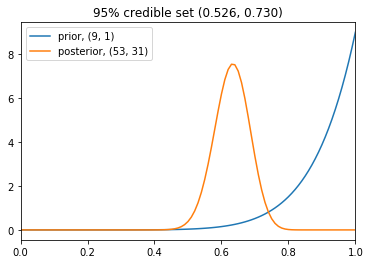

In [19]:
plot_one(alpha=9, beta=1)